In [1]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
except:
	pass


In [2]:
# Import pandas for reading/saving the data
import matplotlib.pyplot as plt
from  pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pandas            as pd


In [3]:
# Load the data
file_name = "data_raw.csv"
data_raw = pd.read_csv("data/data_raw.csv")


In [4]:
# Print some useful information about the data
print(data_raw.dtypes)
data_raw.head(4)
data_raw.describe()


Date             object
Miles           float64
Gas Pumped      float64
Price/Gal       float64
Car MPG         float64
Avg Spd         float64
Car gas         float64
Price/Barrel    float64
Real MPG        float64
paid ($)        float64
Latitude        float64
Longitude       float64
notes            object
dtype: object


,Miles,Gas Pumped,Price/Gal,Car MPG,Avg Spd,Car gas,Price/Barrel,Real MPG,paid ($),Latitude,Longitude
count,183.000000,198.000000,198.000000,188.000000,187.000000,182.000000,198.000000,179.000000,187.000000,154.000000,154.000000
mean,471.526776,13.392256,2.688626,36.882447,50.707487,13.241758,71.422929,34.887006,35.929979,40.993583,-93.636251
std,59.549906,1.408234,0.620717,3.471636,6.426763,3.544370,26.157613,2.741333,8.145867,1.812461,2.466201
min,211.400000,6.514000,1.549000,28.200000,34.500000,5.400000,29.420000,27.720000,13.838013,31.761878,-106.485022
25%,437.300000,13.269250,2.141500,34.100000,46.500000,12.500000,48.240000,32.948000,29.598546,41.586835,-93.631913
50%,472.100000,13.589000,2.629000,36.850000,49.700000,12.900000,59.690000,35.003000,35.135881,41.586835,-93.624959
75%,508.100000,13.981500,3.249000,39.800000,53.050000,13.500000,97.455000,36.951500,42.703854,41.731788,-93.624959
max,864.400000,22.402000,4.099000,44.300000,72.000000,41.100000,108.210000,43.031000,63.492560,43.106456,-76.217705


In [5]:
data_raw = data_raw.dropna(subset=['Date', 'Latitude', 'Longitude'])


In [6]:
# Convert entries into datetime format
new_dates = []
for d,date in enumerate(data_raw.Date):
    # Typically we should make sure here that the data is the expected format
    # But I'm not going to worry about that for this simple sample
    date_arr = date.split('/')
    dat = pd.datetime(int(date_arr[2]), 
                      int(date_arr[0]), 
                      int(date_arr[1]))
    new_dates.append(dat)

# Print some updated information about the database
data_raw.Date = new_dates
data_raw.head(4)
print(data_raw.dtypes)
data_raw.describe()


Date            datetime64[ns]
Miles                  float64
Gas Pumped             float64
Price/Gal              float64
Car MPG                float64
Avg Spd                float64
Car gas                float64
Price/Barrel           float64
Real MPG               float64
paid ($)               float64
Latitude               float64
Longitude              float64
notes                   object
dtype: object


,Miles,Gas Pumped,Price/Gal,Car MPG,Avg Spd,Car gas,Price/Barrel,Real MPG,paid ($),Latitude,Longitude
count,148.000000,154.000000,154.000000,153.000000,152.000000,153.000000,154.000000,144.000000,144.000000,154.000000,154.000000
mean,465.694595,13.517006,2.519364,36.347059,51.531579,13.353595,64.301104,34.490875,33.861379,40.993583,-93.636251
std,59.001388,1.349911,0.581526,3.288698,6.323282,3.837557,25.080771,2.542519,7.451108,1.812461,2.466201
min,211.400000,6.514000,1.549000,28.200000,34.500000,5.400000,29.420000,27.720000,13.838013,31.761878,-106.485022
25%,435.675000,13.404500,2.099000,33.900000,47.975000,12.500000,45.442500,32.662000,28.445589,41.586835,-93.631913
50%,466.950000,13.672000,2.349000,36.600000,50.600000,13.000000,52.295000,34.491500,32.653040,41.586835,-93.624959
75%,499.800000,14.060000,3.069000,39.300000,54.400000,13.500000,93.622500,36.431750,40.100255,41.731788,-93.624959
max,864.400000,22.402000,4.099000,42.800000,72.000000,41.100000,107.260000,41.565000,50.885583,43.106456,-76.217705


 ## Before formatting the data
 The following show what the data looks like before we do any kind of
 data conditioning.

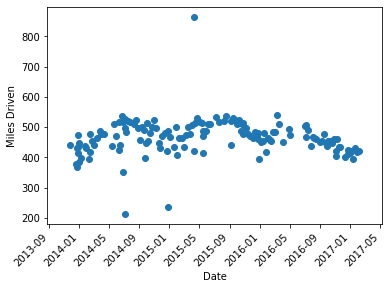

In [7]:
# Plot "Miles driven on one tank" over time
plt.ylabel('Miles Driven')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.scatter(data_raw.Date, data_raw.Miles)


In [8]:
# Cut longitude and latitude based on my home town
data_fmt = data_raw[data_raw.Longitude > -94]
data_fmt = data_fmt[data_fmt.Longitude < -93]
data_fmt = data_fmt[data_raw.Latitude > 41.3]
data_fmt = data_fmt[data_fmt.Latitude < 42.2]


/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


 ## The Final Results
 In the following plot we compare the lon,lat values for all entries (red)
 and for entries specifically around my former home town (green)

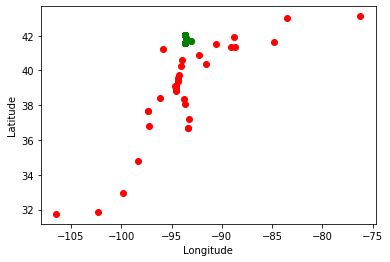

In [9]:
# Plot the distribution of longitude and latitude
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(data_raw.Longitude, data_raw.Latitude, color='red')
plt.scatter(data_fmt.Longitude, data_fmt.Latitude, color='green')


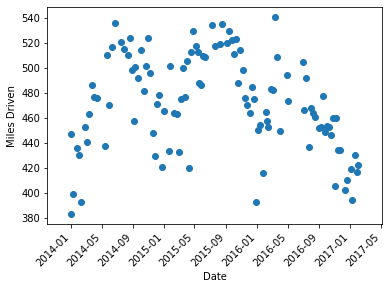

In [10]:
# Plot "Miles driven on one tank" over time after cuts
plt.ylabel('Miles Driven')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.scatter(data_fmt.Date, data_fmt.Miles)


 ## The final database...

In [11]:
print(f"Entries: {len(data_fmt)}")
data_fmt.describe()


Entries: 116


,Miles,Gas Pumped,Price/Gal,Car MPG,Avg Spd,Car gas,Price/Barrel,Real MPG,paid ($),Latitude,Longitude
count,111.000000,116.000000,116.000000,116.000000,115.000000,116.000000,116.000000,110.000000,110.000000,116.000000,116.000000
mean,472.171171,13.783509,2.459517,36.027586,49.837391,13.788793,60.491466,34.343764,33.854419,41.702264,-93.617169
std,37.997637,0.483713,0.522121,3.423311,5.380349,4.102084,23.217503,2.612735,7.015194,0.174340,0.053450
min,383.000000,11.387000,1.549000,28.200000,34.500000,11.700000,29.440000,27.720000,21.549688,41.586835,-93.631913
25%,448.250000,13.499000,2.096500,33.800000,46.900000,12.700000,44.572500,32.464250,28.821185,41.586835,-93.624959
50%,473.800000,13.753500,2.299000,36.050000,49.400000,13.200000,50.870000,34.368500,31.979938,41.586835,-93.624959
75%,505.200000,14.092500,2.909000,38.925000,51.800000,13.600000,79.240000,36.410000,40.118558,41.731788,-93.624959
max,540.800000,14.862000,3.499000,41.800000,68.600000,41.100000,107.260000,39.665000,49.725347,42.030781,-93.057353


In [12]:
# Save the database
data_fmt.to_pickle('data/data_formatted.pkl')
